In [1]:
getwd()

[1] "/hpc/hub_oudenaarden/agiladi/data/small_projects/scripts/hemato_figures"

In [2]:
setwd("../..")

In [3]:
library(devtools)
library(metacell)
#library(dendextend)
#library(DESeq2)
#library(RColorBrewer)
#library(GEOquery)

source("../tuft/scripts/metacell_functions.r")
scdb_init("saved_work", force=T)
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/pic_parser.r")

Warning message:
“package ‘devtools’ was built under R version 4.2.3”
Loading required package: usethis

Warning message:
“package ‘usethis’ was built under R version 4.2.3”
Loading required package: reshape2

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 4.2.3”
Loading required package: plotrix

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotrix’”
initializing scdb to saved_work

ℹ SHA-1 hash of file is "9adfcccbce4f308dad9fb0d084241583dbbeb5b8"
Loading required package: glmnet

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Loaded glmnet 4.1-8



In [4]:
id = "hemato_neut"

id_s = paste0(id, "_f")
#message("Loaded a UMI matrix of ", sc_mat@ncells, " cells and ", sc_mat@ngenes, " genes.")

message("Loading singlets dataset:")
sin_2d = scdb_mc2d(id); sin_cl = scdb_mc(id_s); sin_mat = scdb_mat(id)
lfp = log2(sin_cl@mc_fp)
message("Loaded a metacell object of ", length(sin_cl@mc), " singlets. Total of ", length(table(sin_cl@mc)), " metacells.")


Loading singlets dataset:

Loaded a metacell object of 8329 singlets. Total of 150 metacells.



In [5]:
message("mc contains the assignment of cell to metacell")
head(sin_cl@mc)

message("colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state")
head(sin_cl@colors)

message("color_key maps each color to its annotation")
head(sin_cl@color_key)

message("It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color")
color_scheme = sin_cl@color_key
color2name = as.vector(color_scheme$group); names(color2name) = color_scheme$color
name2color = as.vector(color_scheme$color); names(name2color) = color_scheme$group

message("Now we can assign each cell with its annotation")
sin_names = color2name[ sin_cl@colors[ sin_cl@mc]]; names(sin_names) = names(sin_cl@mc)

as.matrix(table(sin_names))


mc contains the assignment of cell to metacell



AB1007_AAGCCTT AB1007_ACAGCTC AB1007_ACATCCG AB1007_ACGCTAT AB1007_ACTTGGC 
           114            135            112             17            131 
AB1007_AGATACC 
           144

colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state



[1] "gray20" "gray20" "gray20" "cyan3"  "cyan3"  "cyan3"

color_key maps each color to its annotation



,gene,group,color
,<fct>,<fct>,<fct>
1,,Undetermined,gray
2,Mmp8,Mmp8_hi,forestgreen
3,Stfa3,Stfa3_hi,purple
4,Fcnb,Fcnb_mid,red4
5,Fcnb,Fcnb_hi,indianred
6,Elane,Elane_hi,pink


It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color

Now we can assign each cell with its annotation



Dusp1_hi,589
Elane_hi,1328
Ery_outliers,578
Fcnb_hi,499
Fcnb_mid,1744
Il1b_hi,518
Mmp8_hi,382
Mono_outliers,1153
Stfa3_hi,1341
Undetermined,197


In [6]:
message("In addition, metadata per cell can be extracted from the mat object")
sin_stats = sin_mat@cell_metadata[names(sin_cl@mc),]
sin_stats[ sample(rownames(sin_stats), 5),]

In addition, metadata per cell can be extracted from the mat object



,plate,cell,barcode,umicount,mt_frac,Seq.Batch.ID,Date.of.sequencing,Batch.Set.ID,Owner,Date.of.sort,⋯,FACS.machine,Wells,condition,Tissue,Age,Cell_type,Replicate,Analysis,Include,amp_batch_id
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
AB780_TATCGCG,AB780,AB780_TATCGCG,TATCGCG,604,0.01986755,SB011,04/09/2023,Maiia-FL-E16.5,Maiia,16/08/2023,⋯,BD Aria III,ALL,,Liver,E16.5,CD45+,3,Neutrophils,Models,1
AB834_TCGAAGG,AB834,AB834_TCGAAGG,TCGAAGG,545,0.02018349,SB012,14/12/2023,Maiia-BM-E16.5,Maiia,27/09/2023,⋯,BD Aria III (b),ALL,,Bones,E16.5,CD45+,4,Neutrophils,Models,1
AB780_CAATCGA,AB780,AB780_CAATCGA,CAATCGA,4166,0.08425348,SB011,04/09/2023,Maiia-FL-E16.5,Maiia,16/08/2023,⋯,BD Aria III,ALL,,Liver,E16.5,CD45+,3,Neutrophils,Models,1
AB1392_TCCATGC,AB1392,AB1392_TCCATGC,TCCATGC,4060,0.07438424,SB016,19/11/2024,Maiia-index,Maiia,03/11/2024,⋯,S6,ALL,,Liver,P0,CD45+,NA,Neutrophils,Index,1
AB344_ATCCAGG,AB344,AB344_ATCCAGG,ATCCAGG,839,0.09296782,SB006,18/09/2022,Maiia-FL-P0,Maiia,17/08/2022,⋯,BD Aria III,ALL,,Liver,P0,CD45+,1,Neutrophils,Models,1


In [7]:
annotations = as.matrix(read.delim(paste0("config/", id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
lin_ord = annotations
lin_ord

[1] "Elane_hi"      "Fcnb_hi"       "Fcnb_mid"      "Mmp8_hi"      
 [5] "Stfa3_hi"      "Dusp1_hi"      "Il1b_hi"       "Mono_outliers"
 [9] "Ery_outliers"  "Undetermined"

zlim: -7.43949135261453<>7.43949135261453



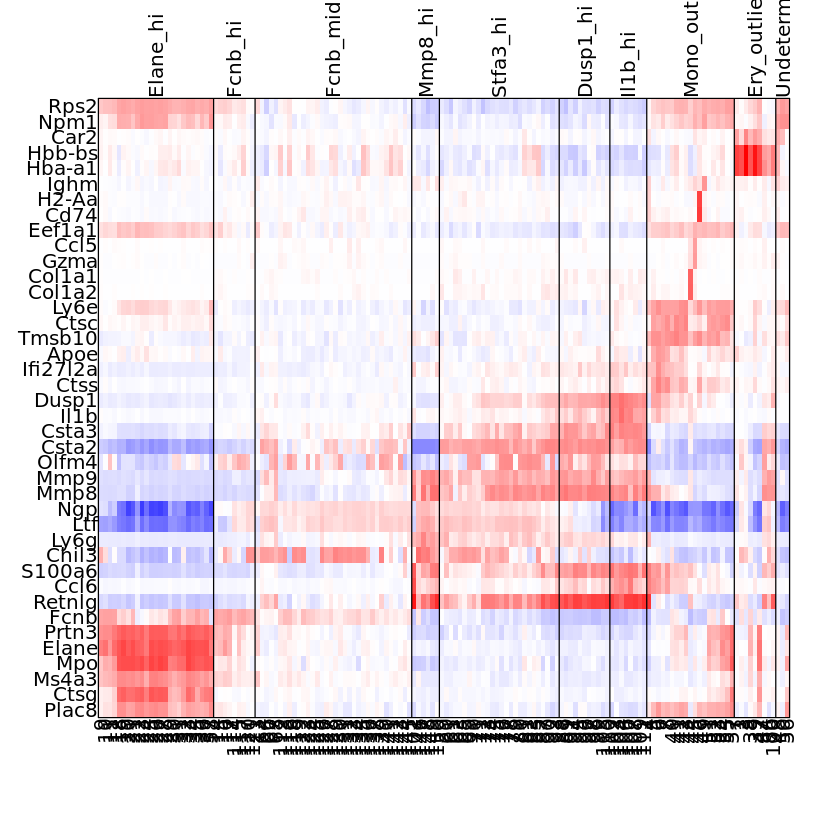

In [8]:
mc2lin = factor(color2name[ sin_cl@colors], levels = lin_ord); 
names(mc2lin) = seq_along(mc2lin)
mc_ord = order(mc2lin)

lfp = log2(sin_cl@mc_fp)
nms = choose_genes_from_clust(mc_id = id_s,      # the unique id of the mc object
                              mat_id = id_s,     # the unique id of the mat object
                              nms_per_clust = 2, # number of differential genes per metacell
                              nms_thresh = 2)  # minimum threshold for gene enrichment

IM = lfp[ nms, mc_ord]
IM = IM[ order(max.col(IM)),]

image.2(IM, balance=T, vct = mc2lin[ colnames(IM)])
box()

In [16]:
table(sin_names)
bad_pops = c('Mono_outliers', 'Ery_outliers', 'Undetermined', "Mmp8_hi")
good_pops = setdiff(lin_ord, bad_pops)
good_cells = names(sin_names)[ sin_names %in% good_pops]
good_cells = intersect(good_cells, rownames(sin_stats)[ sin_stats$Tissue != "Bone adult"])
length(good_cells)

sin_names
     Dusp1_hi      Elane_hi  Ery_outliers       Fcnb_hi      Fcnb_mid 
          589          1328           578           499          1744 
      Il1b_hi       Mmp8_hi Mono_outliers      Stfa3_hi  Undetermined 
          518           382          1153          1341           197 

[1] 6013

In [17]:
dir.create("figures")
outdir = "figures/figure3"
dir.create(outdir)

Warning message in dir.create("figures"):
“'figures' already exists”
Warning message in dir.create(outdir):
“'figures/figure3' already exists”


In [18]:
pdf(paste0(outdir, "/Fig1D.pdf"), useDingbats = F)
plot.2(sin_2d@sc_x[ good_cells], sin_2d@sc_y[ good_cells], col = sin_cl@colors[ sin_cl@mc[ good_cells]])
dev.off()

pdf(paste0(outdir, "/Fig1D_legend.pdf"), useDingbats = F)
plot.empty()
legend("topleft", good_pops, pch = 20, pt.cex = 2, col = name2color[ good_pops])
dev.off()


pdf 
  2

pdf 
  2

In [19]:
table(sin_stats[ good_cells, "Tissue"])
tissue = ifelse(sin_stats$Tissue == "Liver", "Liver", "Bone")
names(tissue) = rownames(sin_stats)

good_cells = sample(good_cells)

pdf(paste0(outdir, "/Fig1E.pdf"), useDingbats = F)
plot.2(sin_2d@sc_x[ good_cells], sin_2d@sc_y[ good_cells], 
       col = ifelse(tissue[ good_cells] == "Liver", "red", "blue"))
dev.off()


Bones Liver 
 1717  4296 

pdf 
  2

In [20]:
comb = paste0(tissue, "@", sin_stats$Age)
names(comb) = rownames(sin_stats)
table(comb)

comb
 Bone@E16.5     Bone@P0     Bone@P5 Bone@Week 6 Liver@E14.5 Liver@E16.5 
        376         883         781         437         835        1429 
   Liver@P0    Liver@P5 
       2465        1123 

In [21]:
sample_dist = table(comb[ good_cells], factor(sin_names[ good_cells], levels = good_pops))
dist_n = sample_dist / rowSums(sample_dist)

l = names(table(tissue))
for (c in l) {
    pdf(paste0(outdir, "/sample_dist_", c, ".pdf"), height = 5, width = 4)
    X = dist_n[ grep(paste0(c, "@"), rownames(dist_n)),]
    rownames(X) = vecsplit(rownames(X), "@", 2)
    barplot(t(X) * 100, col = name2color[ colnames(sample_dist)], main = c, axes = F)
    axis(2, las = 2)
    dev.off()
}

In [22]:
umis = read_large_umis(id, cells = good_cells)
umis_n = sweep(umis, 2, colSums(umis), "/") * 1000

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


In [23]:
good_pops

[1] "Elane_hi" "Fcnb_hi"  "Fcnb_mid" "Stfa3_hi" "Dusp1_hi" "Il1b_hi"

In [25]:
genes = c("Elane", "Gstm1", "Pcna", "Top2a", "Fcnb", "Ltf", "Csf3r",
         "Retnlg", "Mmp8", "Dusp1", "Il1b", "Stfa1", "Csta2")
#         "IL13RA2", "IL6ST", "IL17RA")
m = t(apply(umis_n[genes, good_cells], 1, tapply, 
            factor(sin_names[ good_cells], levels = good_pops), mean))
#m = m[, intersect(lin_ord, names(which(table(sc_names[ good_cells]) > 20)))]
IM = log2(m[, rev(colnames(m))] + 0.02)
exp_freq = t(apply(umis[genes, good_cells] > 0, 1, tapply, sin_names[ good_cells], mean)) * 100
exp_freq = exp_freq[ ,colnames(IM)]

grad = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(101)

p = function() {
    par(mar = c(3,10,1,3))
    matplot.2(t(IM), t(exp_freq), grad=grad, cex_lim = seq(0,100, by = 25))
}

pdf(paste0(outdir, "/gene_expression.pdf"), height = 10, width = 15, useDingbats = F)
p()
dev.off()

pdf 
  2

In [26]:
g1 = intersect(good_cells, names(which(tissue == "Liver")))
g2 = intersect(good_cells, names(which(tissue == "Bone")))
length(g1)
length(g2)

[1] 4296

[1] 1717

In [27]:
genes = scr_chi_square_diff_genes(umis, g1 = g1, g2 = g2, pval = 1e-4, fdr = T)
length(genes)

[1] 2761

In [28]:
m = t(apply(umis_n[, good_cells], 1, tapply, tissue[ good_cells], mean))

In [29]:
head(m)

,Bone,Liver
0610005C13Rik,0.000000000,0.0004479342
0610006L08Rik,0.000000000,0.0000000000
0610009B22Rik,0.014422363,0.0204475303
0610009E02Rik,0.000000000,0.0007861252
0610009L18Rik,0.005124041,0.0032217050
0610010K14Rik,0.000000000,0.0000000000


In [30]:
reg = 0.05
a = "Liver"; b = "Bone"
x = log2(reg + m[,a])
y = log2(reg + m[,b])
z = log2((reg + m[,b]) / (reg + m[,a]))
head(sort(z,T),10)
head(sort(z,F),10)

disp_genes = setdiff(
    c(names(head(sort(z,T),10)),
    names(tail(sort(z,T),10))),
    c("Hbb-bs", "Hba-a1", "Hbb-bt")
)

disp_genes

Il1b    Cxcl2   Retnlg    Dusp1     Ccl6   S100a6   Clec4d    Csta3 
3.528344 2.860674 2.621567 2.485010 2.430726 2.393110 2.185038 1.978738 
  Pla2g7     Btg1 
1.976885 1.873916

Hbb-bs     Prtn3    Hba-a1       Mpo     Elane      Ctsg    Hbb-bt      Fcnb 
-2.878259 -2.870040 -2.802125 -2.768197 -2.589340 -2.396497 -2.207568 -2.157086 
   Hba-a2     Ms4a3 
-2.147212 -2.100898

[1] "Il1b"   "Cxcl2"  "Retnlg" "Dusp1"  "Ccl6"   "S100a6" "Clec4d" "Csta3" 
 [9] "Pla2g7" "Btg1"   "Ms4a3"  "Hba-a2" "Fcnb"   "Ctsg"   "Elane"  "Mpo"   
[17] "Prtn3"

In [31]:
df = data.frame(x,y,disp = names(x) %in% genes & abs(z) > 1)
df$rx = round(x,2)
df$ry = round(y,2)
df$dup = duplicated(df[,c("disp", "rx", "ry")])
head(df)
table(df$dup)

,x,y,disp,rx,ry,dup
,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>
0610005C13Rik,-4.309061,-4.321928,FALSE,-4.31,-4.32,FALSE
0610006L08Rik,-4.321928,-4.321928,FALSE,-4.32,-4.32,FALSE
0610009B22Rik,-3.827307,-3.956295,FALSE,-3.83,-3.96,FALSE
0610009E02Rik,-4.299422,-4.321928,FALSE,-4.30,-4.32,FALSE
0610009L18Rik,-4.231841,-4.181175,FALSE,-4.23,-4.18,FALSE
0610010K14Rik,-4.321928,-4.321928,FALSE,-4.32,-4.32,TRUE



FALSE  TRUE 
 5931 24399 

In [32]:
pdf(paste0(outdir, "/diff_expression_by_tissue.pdf"), height = 5, width = 5, useDingbats = F)
with(df[ !df$dup,], plot.2(x,y, xlab = a, ylab = b, col = ifelse(disp, "tomato", "gray")))
abline(coef = c(0,1))
abline(coef = c(1,1), lty = 2)
abline(coef = c(-1,1), lty = 2)
text(x[ disp_genes],y[ disp_genes], disp_genes)
dev.off()

pdf 
  2